# 1次元移流方程式

## 準備

In [1]:
using PyPlot
using OffsetArrays  # 配列の添え字を自由にする

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1423


## 次元

In [2]:
imax = 100
dx = 1.0
dt = 0.1
c = 1.0
x = range( 0, (imax-1)*dx, step=dx )

0.0:1.0:99.0

## 初期条件

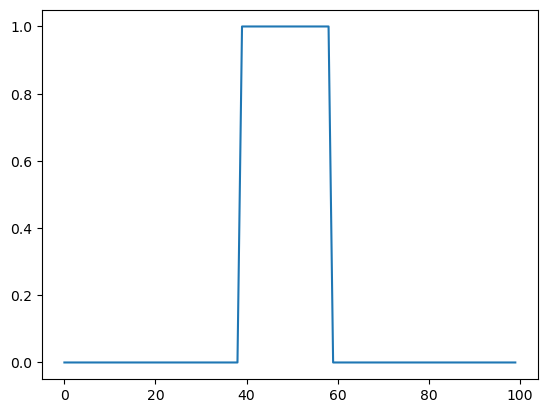

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall C:\Users\thisi\.julia\packages\PyCall\L0fLP\src\numpy.jl:67


100-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [3]:
u = zeros(Float64,imax)
for i in 1:length(u)
    if i >= imax/2-imax/10 && i < imax/2+imax/10
        u[i] = 1.0
    end
end
plot(x,u)
u

## 支配方程式

$$
  \frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0
$$

## 上流差分
$$
      du_i = -c \frac{\Delta t}{\Delta x} ( u_i - u_{i-1} )  \mbox{ for $c > 0$ } \\
      du_i = -c \frac{\Delta t}{\Delta x} ( u_{i+1} - u_i )  \mbox{ for $c < 0$ } \\
$$

In [4]:
du = Array{Float64}(undef,imax)

100-element Vector{Float64}:
 7.4e-323
 9.4e-323
 1.04e-322
 1.14e-322
 1.3e-322
 2.0e-322
 2.17e-322
 2.27e-322
 2.37e-322
 2.5e-322
 2.9e-322
 3.1e-322
 3.16e-322
 ⋮
 1.66e-321
 1.685e-321
 1.7e-321
 1.74e-321
 1.75e-321
 1.754e-321
 1.764e-321
 1.77e-321
 1.774e-321
 1.78e-321
 1.79e-321
 1.793e-321

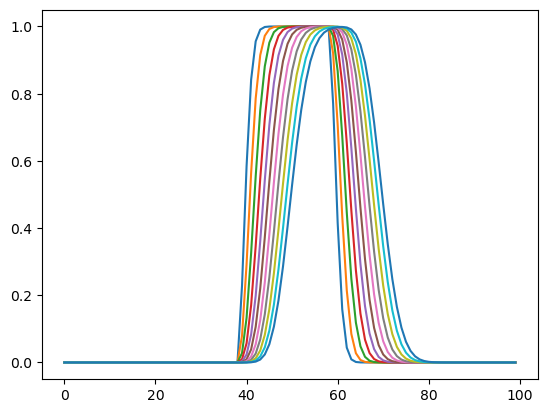

In [10]:
function OneStepAdvance!(u)
    for i in 1:length(u)
        il = i - 1
        if il < 1
            il = il + imax
        end
#    du[i] = -c * dt / dx * ( u[i] - circshift(u,+1)[i] )
        du[i] = -c * dt / dx * ( u[i] - u[il] )
#        println( i, ":", u[i], ", ", du[i] )
    end
    u = u + du
    return u
end

plot(x,u)
#println( u )

#u = OneStepAdvance!(u)
#plot(x,u)

for t in 1:1000
    u = OneStepAdvance!(u)
    if rem(t,10) == 0
        plot(x,u)
    end
end

#println( u )
